Codigo para implementar una cinemática inversa en un brazo robotico

Exportamos las librerías necesarias

In [1]:
### libreria ikpy (inverse kinematics) para hallar los angulos necesarios para que el efector final de brazo robotico
### se desplace hacia el objetivo solicitado
import ikpy.chain
import ikpy.utils.plot as plot_utils

### se importan las biblioteca numpy (matrices) , tambien time y math
import numpy as np
import time
import math

### se importa libería ipywidgets para crear graficos y controles interactivos
import ipywidgets as widgets

Se importa la simulación del brazo robotico de formato URDF. El primer link es el link entre la superficie y la base del brazo robotico, estará desactivado

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("arm_urdf.urdf",active_links_mask=[False, True, True, True, True, True, True])

Definimos la posición y la orientación para el objetivo solicitado

In [3]:
def doIK():
    global ik
    ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Z")

def move(x,y,z):
    global target_position
    target_position = [x,y,z]
    doIK()
def orientation(a,b,c):
    global target_orientation
    target_orientation = [a,b,c]
    doIK()

In [4]:
move(0,0.2,0.3)
orientation(-1, 0, 0)

NameError: name 'target_orientation' is not defined

Se procede a hallar la cinematica inversa. El primer angulo que vote el array siempre sera 0 ya que es el vinculo entre la superficie y la base del brazo robotico, los angulos estarán en radiantes que posteriormente se convertiran a grados

Se procede a verificar la posición del brazo robotico mediante cinematica directa usando los angulos que fueron obtenidos con la cinematica inversa


In [5]:
computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

Computed position: [0.    0.    0.577], original position : [0, 0, 0.58]
Computed position (readable) : ['0.00', '0.00', '0.58']


Se procede a realizar la simulación gráfica del desplazamiento del brazo robotico usando la biblioteca matplotlib

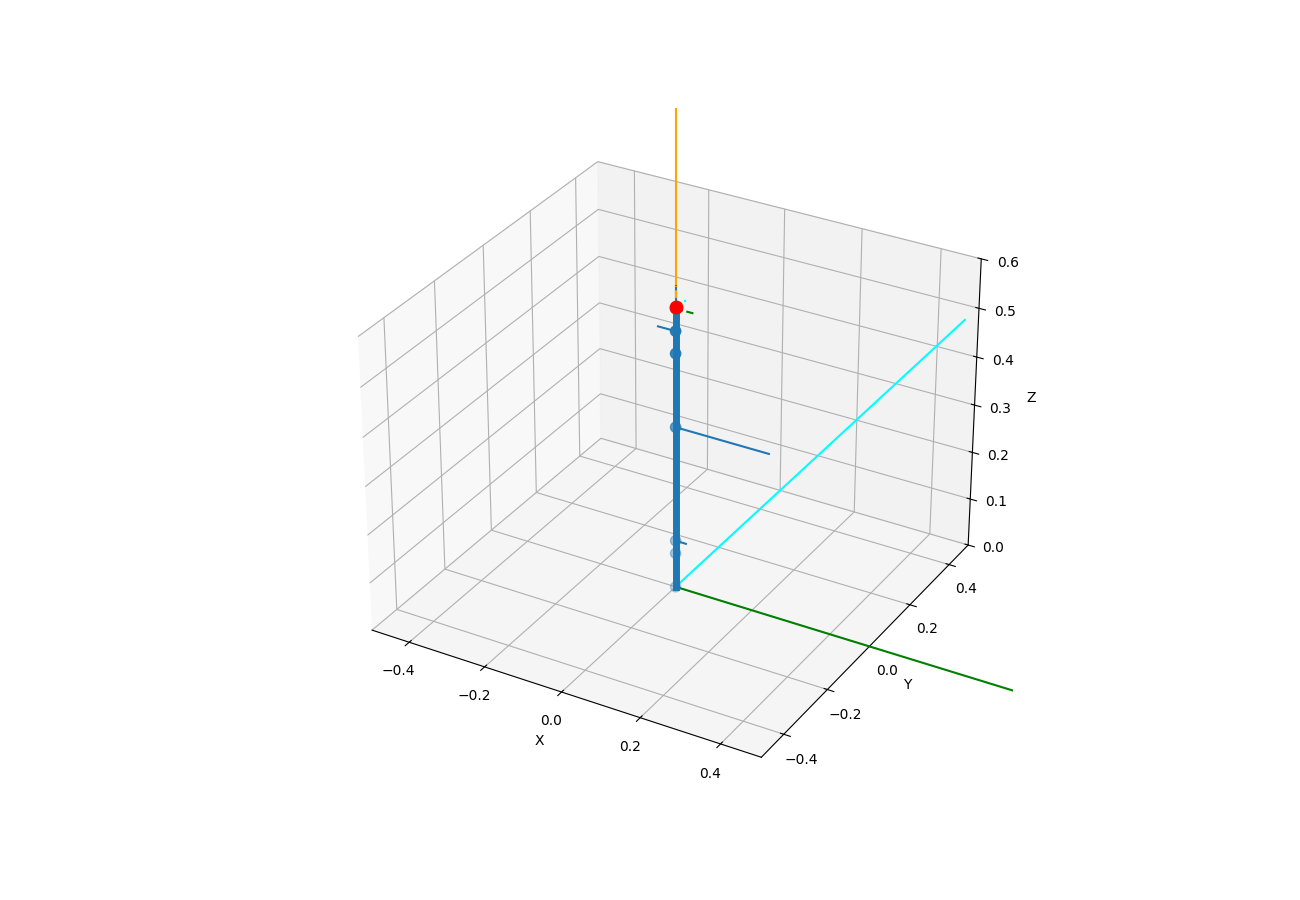

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()